### Tensorflow on MNIST

In [1]:
import tensorflow as tf
# check the version of tf
tf.__version__

'2.1.0'

In [2]:
# import the dataset
mnist_data = tf.keras.datasets.mnist

# split the data into train and test
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

In [3]:
# print the first observation from training data
#x_train[0]

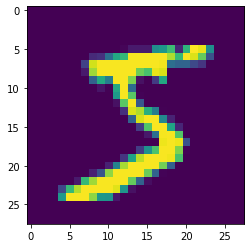

In [4]:
# visualize the data
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

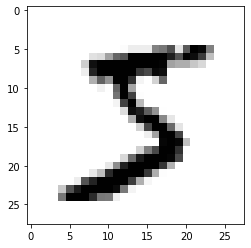

In [5]:
# to remove the color from the visualization above
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [6]:
# normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
#x_train[0]

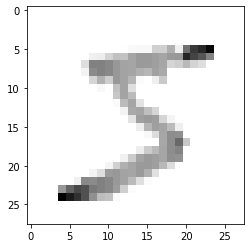

In [7]:
# visualiza the first observation post normalization
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [8]:
# build model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 1st hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 2nd hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer

In [9]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
# fit the model
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2591 - accuracy: 0.9243
Epoch 2/3
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1039 - accuracy: 0.9681
Epoch 3/3
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0720 - accuracy: 0.9775


In [11]:
# evaluate the model
val_loss, val_accu = model.evaluate(x_test, y_test)
print(val_loss, val_accu)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.0890 - accuracy: 0.9729
0.0890484703627415 0.9729


In [12]:
# save the model
model.save("models/mnist_model")

#load the model
new_model = tf.keras.models.load_model("models/mnist_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/mnist_model/assets


In [13]:
# predict on testing data
predictions = new_model.predict(x_test)
predictions

array([[5.01647364e-08, 9.00300563e-08, 3.82161716e-06, ...,
        9.99976516e-01, 8.97398067e-08, 3.50696254e-08],
       [5.92865092e-07, 7.66627677e-03, 9.91167009e-01, ...,
        3.25666036e-07, 1.45685990e-04, 1.13580284e-10],
       [1.93885839e-07, 9.99862909e-01, 6.66633332e-06, ...,
        5.61551387e-05, 5.21136753e-05, 3.79624538e-07],
       ...,
       [1.14854064e-08, 1.23093760e-05, 3.54268536e-07, ...,
        5.08907578e-05, 7.75949593e-06, 3.56199234e-05],
       [1.60973279e-08, 7.56127633e-07, 7.52137130e-10, ...,
        4.57802898e-08, 4.42845310e-04, 6.54465016e-09],
       [1.07695132e-06, 4.74951598e-08, 2.57457174e-07, ...,
        9.12300624e-10, 2.67862532e-07, 5.25093924e-09]], dtype=float32)

In [14]:
import numpy as np

np.argmax(predictions[0])

7

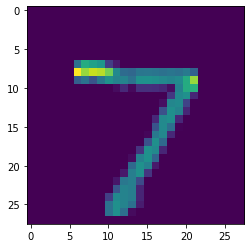

In [15]:
plt.imshow(x_test[0])